In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read train and test set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [3]:
train

TimeStamp  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [4]:
#Data preparation
ID_train = train.ID
ID_test = test.ID
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)
train

TimeStamp  Junction  Vehicles
0      2015-11-01 00:00:00         1        15
1      2015-11-01 01:00:00         1        13
2      2015-11-01 02:00:00         1        10
3      2015-11-01 03:00:00         1         7
4      2015-11-01 04:00:00         1         9
...                    ...       ...       ...
48115  2017-06-30 19:00:00         4        11
48116  2017-06-30 20:00:00         4        30
48117  2017-06-30 21:00:00         4        16
48118  2017-06-30 22:00:00         4        22
48119  2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]

In [5]:
#Rename columns
train.rename(columns={'TimeStamp':'ds', 'Junction': 'add1', 'Vehicles': 'y'}, inplace=True)
test.rename(columns={'TimeStamp':'ds', 'Junction': 'add1'}, inplace=True)
train

ds  add1   y
0      2015-11-01 00:00:00     1  15
1      2015-11-01 01:00:00     1  13
2      2015-11-01 02:00:00     1  10
3      2015-11-01 03:00:00     1   7
4      2015-11-01 04:00:00     1   9
...                    ...   ...  ..
48115  2017-06-30 19:00:00     4  11
48116  2017-06-30 20:00:00     4  30
48117  2017-06-30 21:00:00     4  16
48118  2017-06-30 22:00:00     4  22
48119  2017-06-30 23:00:00     4  12

[48120 rows x 3 columns]

Text(0, 0.5, 'y')

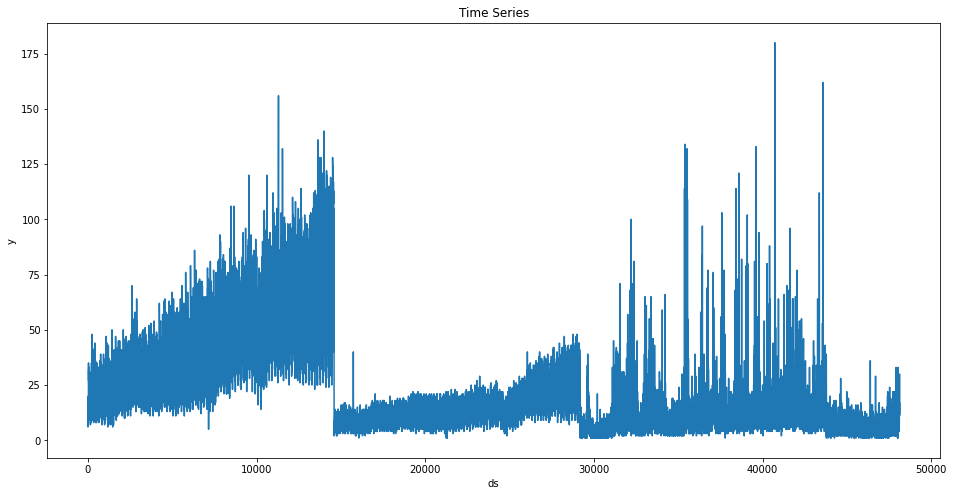

In [6]:
#Plot
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

In [7]:
X_train = train.loc[train["ds"]<"2017-01-01"]
X_val  = train.loc[train["ds"]>="2017-01-01"]
X_test = test.loc[test["ds"]>="2017-07-01"]

In [8]:
from fbprophet import Prophet

timeseries_model = Prophet()
timeseries_model.add_regressor('add1')
timeseries_model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
#Predict on validation set

forecast = timeseries_model.predict(X_val.drop(columns="y"))
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0     2017-01-01 00:00:00  26.621046   21.082822   47.440049    26.621046   
1     2017-01-01 00:00:00  26.621046   -3.752112   22.425055    26.621046   
2     2017-01-01 00:00:00  26.621046    8.104562   34.991081    26.621046   
3     2017-01-01 00:00:00  26.621046  -16.215094   10.253273    26.621046   
4     2017-01-01 01:00:00  26.620751   -6.727478   19.905745    26.620751   
...                   ...        ...         ...         ...          ...   
17371 2017-06-30 22:00:00  25.341705    6.721337   77.968777    -6.787295   
17372 2017-06-30 23:00:00  25.341411   -8.029501   63.102419    -6.798155   
17373 2017-06-30 23:00:00  25.341411    3.675448   74.127220    -6.798155   
17374 2017-06-30 23:00:00  25.341411  -20.555464   50.215285    -6.798155   
17375 2017-06-30 23:00:00  25.341411  -30.734206   39.287517    -6.798155   

       trend_upper       add1  add1_lower  add1_upper  additive_terms  ...  \
0        26.621046  12.283974   12.283974   12.283974        7.348546  ...   
1        26.621046 -12.283974  -12.283974  -12.283974      -17.219403  ...   
2        26.621046   0.000000    0.000000    0.000000       -4.935428  ...   
3        26.621046 -24.567949  -24.567949  -24.567949      -29.503377  ...   
4        26.620751 -12.283974  -12.283974  -12.283974      -19.912576  ...   
...            ...        ...         ...         ...             ...  ...   
17371    57.871538  12.283974   12.283974   12.283974       16.141504  ...   
17372    57.889887   0.000000    0.000000    0.000000        2.095758  ...   
17373    57.889887  12.283974   12.283974   12.283974       14.379732  ...   
17374    57.889887 -12.283974  -12.283974  -12.283974      -10.188217  ...   
17375    57.889887 -24.567949  -24.567949  -24.567949      -22.472191  ...   

       extra_regressors_additive  extra_regressors_additive_lower  \
0                      12.283974                        12.283974   
1                     -12.283974                       -12.283974   
2                       0.000000                         0.000000   
3                     -24.567949                       -24.567949   
4                     -12.283974                       -12.283974   
...                          ...                              ...   
17371                  12.283974                        12.283974   
17372                   0.000000                         0.000000   
17373                  12.283974                        12.283974   
17374                 -12.283974                       -12.283974   
17375                 -24.567949                       -24.567949   

       extra_regressors_additive_upper    weekly  weekly_lower  weekly_upper  \
0                            12.283974 -5.192989     -5.192989     -5.192989   
1                           -12.283974 -5.192989     -5.192989     -5.192989   
2                             0.000000 -5.192989     -5.192989     -5.192989   
3                           -24.567949 -5.192989     -5.192989     -5.192989   
4                           -12.283974 -5.275942     -5.275942     -5.275942   
...                                ...       ...           ...           ...   
17371                        12.283974 -0.219215     -0.219215     -0.219215   
17372                         0.000000 -0.385976     -0.385976     -0.385976   
17373                        12.283974 -0.385976     -0.385976     -0.385976   
17374                       -12.283974 -0.385976     -0.385976     -0.385976   
17375                       -24.567949 -0.385976     -0.385976     -0.385976   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...              

In [10]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

30.689316540922256


In [11]:
df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

actual  predicted
0          27         33
1          23          9
2          17         21
3          16         -2
4          16          6
...       ...        ...
17371      11         41
17372      30         27
17373      16         39
17374      22         15
17375      12          2

[17376 rows x 2 columns]

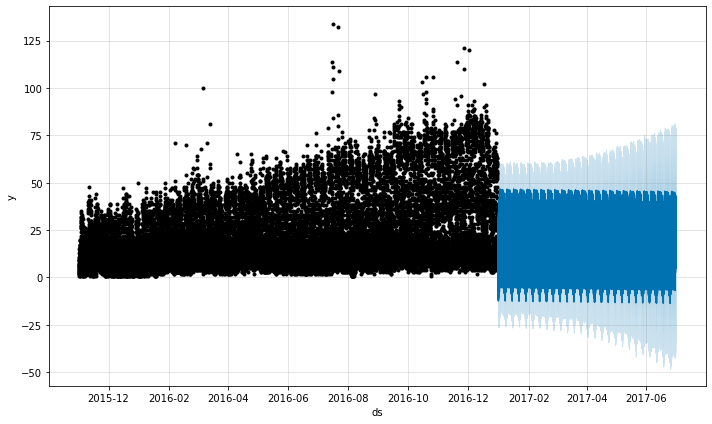

In [12]:
fig1 = timeseries_model.plot(forecast)


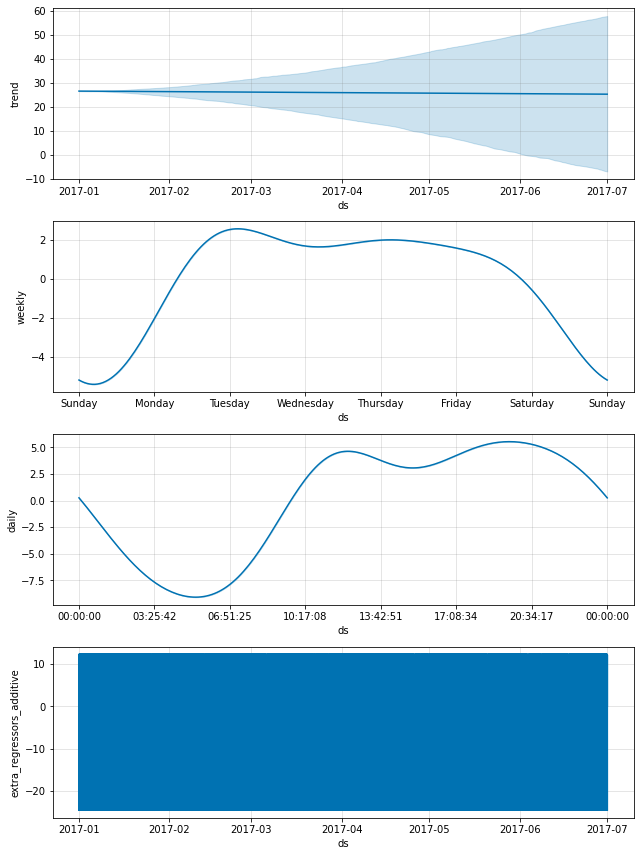

In [13]:
fig2 = timeseries_model.plot_components(forecast)


In [14]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(timeseries_model, forecast)

In [15]:
plot_components_plotly(timeseries_model, forecast)


In [16]:
#Predict on test set

prediction = timeseries_model.predict(X_test)
prediction

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0     2017-07-01 00:00:00  25.341116    3.510521   73.245947    -5.571412   
1     2017-07-01 00:00:00  25.341116   -7.005584   60.756253    -5.571412   
2     2017-07-01 00:00:00  25.341116  -34.758403   35.047671    -5.571412   
3     2017-07-01 00:00:00  25.341116  -20.194847   47.512820    -5.571412   
4     2017-07-01 01:00:00  25.340822  -36.193436   31.465298    -5.586807   
...                   ...        ...         ...         ...          ...   
11803 2017-10-31 22:00:00  24.471919  -25.990515  112.658703   -41.867668   
11804 2017-10-31 23:00:00  24.471625  -39.013148   96.653340   -41.890114   
11805 2017-10-31 23:00:00  24.471625  -27.833904  110.634908   -41.890114   
11806 2017-10-31 23:00:00  24.471625  -50.197387   84.969233   -41.890114   
11807 2017-10-31 23:00:00  24.471625  -63.764735   75.840713   -41.890114   

       trend_upper       add1  add1_lower  add1_upper  additive_terms  ...  \
0        56.501771  12.283974   12.283974   12.283974       11.980258  ...   
1        56.501771   0.000000    0.000000    0.000000       -0.303717  ...   
2        56.501771 -24.567949  -24.567949  -24.567949      -24.871666  ...   
3        56.501771 -12.283974  -12.283974  -12.283974      -12.587691  ...   
4        56.519121 -24.567949  -24.567949  -24.567949      -27.665401  ...   
...            ...        ...         ...         ...             ...  ...   
11803    91.604535  12.283974   12.283974   12.283974       18.098229  ...   
11804    91.615303   0.000000    0.000000    0.000000        4.190519  ...   
11805    91.615303  12.283974   12.283974   12.283974       16.474494  ...   
11806    91.615303 -12.283974  -12.283974  -12.283974       -8.093455  ...   
11807    91.615303 -24.567949  -24.567949  -24.567949      -20.377430  ...   

       extra_regressors_additive  extra_regressors_additive_lower  \
0                      12.283974                        12.283974   
1                       0.000000                         0.000000   
2                     -24.567949                       -24.567949   
3                     -12.283974                       -12.283974   
4                     -24.567949                       -24.567949   
...                          ...                              ...   
11803                  12.283974                        12.283974   
11804                   0.000000                         0.000000   
11805                  12.283974                        12.283974   
11806                 -12.283974                       -12.283974   
11807                 -24.567949                       -24.567949   

       extra_regressors_additive_upper    weekly  weekly_lower  weekly_upper  \
0                            12.283974 -0.561277     -0.561277     -0.561277   
1                             0.000000 -0.561277     -0.561277     -0.561277   
2                           -24.567949 -0.561277     -0.561277     -0.561277   
3                           -12.283974 -0.561277     -0.561277     -0.561277   
4                           -24.567949 -0.744793     -0.744793     -0.744793   
...                                ...       ...           ...           ...   
11803                        12.283974  1.737510      1.737510      1.737510   
11804                         0.000000  1.708785      1.708785      1.708785   
11805                        12.283974  1.708785      1.708785      1.708785   
11806                       -12.283974  1.708785      1.708785      1.708785   
11807                       -24.567949  1.708785      1.708785      1.708785   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...              